In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append("../modules")

from HPIB_plot import *
from scipy.constants import e, k
from scipy.special import lambertw
from scipy.optimize import least_squares

'C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/TN12/IdVds - 240627 143820.png'

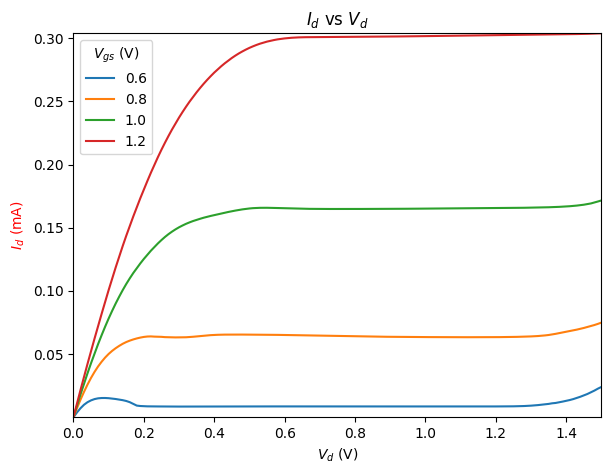

In [95]:
path='C:/Users/Zucchi/Documents/Medidas/240621 - TN3 TN12 TP1 DN1 DN2 CB1/TN12/IdVds - 240627 143820.csv'
Plot(path, 'Vd', 'Id')

In [96]:
try: df=pd.read_csv(path, header=[0, 1])
except: print("Error opening VGS\n")
    
if df.columns.levels[1][0] != 'None':
    df.columns.levels[1][0] != ''

VD=getpd(df, 'Vd')
ID=getpd(df, 'Id')
IG=getpd(df, 'Ig')
IS=getpd(df, 'Is')
Ib=getpd(df, 'Ib')



if 'gm' not in df.columns:
    gm=(np.diff(df['Id'].T)/np.diff(df['Vg'].T)).T
    gm=np.append([gm[0]], gm)

    header=pd.MultiIndex.from_product([['gm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=gm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    gm=getpd(df, 'gm')

if 'dgm' not in df.columns:
    dgm=(np.diff(df['gm'].T)/np.diff(df['Vg'].T)).T
    dgm=np.append(dgm, [dgm[-1]])

    header=pd.MultiIndex.from_product([['dgm'],
                                df['Vg'].columns])

    df2=pd.DataFrame(data=dgm, columns=header)
    df=pd.concat((df, df2), axis=1)

    df.to_csv(path, index=False, float_format='%.5E')
else:
    dgm=getpd(df, 'dgm')

VGfit=VG[np.argmax(gm)-2:np.argmax(gm)+2]
IDfit=ID[np.argmax(gm)-2:np.argmax(gm)+2]

m, b= np.polyfit(VGfit, IDfit, 1)
LIN=-b/m+VD/2
fitID=m*VG[:np.argmax(gm)]+b

Plot(path, 'Vg', ['Id', 'gm'])

for n, V in enumerate(VG):
    if V > LIN:
        break

pt=6
ptp=4
ptm=2
T=49

plt.close('all')

y=np.log10(ID/(gm*k*T/e))
x=np.log10(ID)

plt.plot(x, y, '.')

KeyError: 'Vg'

In [105]:
np.min(df['Id']/df['Is'])

-1.0834303382492674

In [66]:
m, b=np.polyfit(x[-6:], y[-6:], 1)
10**((1-b)/m)

1.7335790051001833e-05